## Neural Network Algorithms

- [Importable source code (most up-to-date version)](https://github.com/sylvaticus/BetaML.jl/blob/master/src/Nn.jl) - [Julia Package](https://github.com/sylvaticus/BetaML.jl)
- [Demonstrative static notebook](https://github.com/sylvaticus/BetaML.jl/blob/master/notebooks/Nn.ipynb)
- [Demonstrative live notebook](https://mybinder.org/v2/gh/sylvaticus/BetaML.jl/master?filepath=notebooks%2FNn.ipynb) (temporary personal online computational environment on myBinder) - it can takes minutes to start with!
- Theory based on [MITx 6.86x - Machine Learning with Python: from Linear Models to Deep Learning](https://github.com/sylvaticus/MITx_6.86x) ([Unit 3](https://github.com/sylvaticus/MITx_6.86x/blob/master/Unit%2003%20-%20Neural%20networks/Unit%2003%20-%20Neural%20networks.md))
- New to Julia? [A concise Julia tutorial](https://github.com/sylvaticus/juliatutorial) - [Julia Quick Syntax Reference book](https://julia-book.com)


In [1]:
using Pkg
if ! haskey(Pkg.dependencies(), Base.UUID("f3b207a7-027a-5e70-b257-86293d7955fd")) 
    println("Adding StatsPlots..")
    Pkg.add("StatsPlots")
end
using BetaML.Nn, Random, DelimitedFiles, StatsPlots
Random.seed!(123);

## Non-linear regression

In [2]:
# Set Random data
xtrain = rand(3000,3)
ytrain = [(0.5*x[1]+0.2*x[2]^2+0.3*x[3]+1) * rand(0.9:0.001:1.1)  for (i,x) in enumerate(eachrow(xtrain))]
xtest  = rand(300,3)
ytest  = [(0.5*x[1]+0.2*x[2]^2+0.3*x[3]+1) * rand(0.9:0.001:1.1)  for (i,x) in enumerate(eachrow(xtest))]

300-element Array{Float64,1}:
 1.3255856733435873
 1.1071026899245373
 1.3894364502443532
 1.3249567356379555
 1.2448902290698893
 1.0934248345698743
 1.5427062757081176
 1.7406198744566959
 1.5884020550850704
 1.7012929087890027
 1.4940001875179245
 1.4975475302388948
 1.365931802477326
 ⋮
 1.0390385538109934
 1.0817546118112942
 1.439758839733331
 1.5310949342647984
 1.4276214512267411
 1.3396449886879134
 1.5787838969818437
 1.3606822990452454
 1.2816152051234078
 1.4841607375871988
 1.2904978749057252
 1.6837002403038692

In [3]:
# Define the network
l1   = DenseLayer(3,2,)
l2   = DenseLayer(2,2,f=relu)
l3   = DenseLayer(2,1)
mynn = buildNetwork([l1,l2,l3],squaredCost,name="Feed-forward Neural Network Model 1")

NN(Layer[DenseLayer([0.8174535605328586 0.7166884679582948 0.7540137440697796; 0.1366690115483593 0.9333313407899195 0.8250054907607947], [0.20092395348618486, 0.16253346100611155], identity, nothing), DenseLayer([0.25153403368354077 0.9412744572975638; 0.22813558115889943 0.22600225469325586], [0.20892150600846326, 0.8289784689687791], BetaML.Utils.relu, nothing), DenseLayer([0.4215445785476575 0.4424289757716888], [0.6928481390816039], identity, nothing)], BetaML.Utils.squaredCost, nothing, false, "Feed-forward Neural Network Model 1")

In [4]:
train!(mynn,xtrain,ytrain,epochs=10,batchSize=32,verbosity=STD,optAlg=ADAM())

***
*** Training Feed-forward Neural Network Model 1 for 10 epochs with algorithm ADAM.
Training.. 	 avg ϵ on (Epoch 1 Batch 93): 	 0.010720720345561612


Training the Neural Network... 10%|██▏                  |  ETA: 0:03:10

Training.. 	 avg ϵ on (Epoch 2 Batch 93): 	 0.0129067312927445
Training.. 	 avg ϵ on (Epoch 3 Batch 93): 	 0.010954488995637876
Training.. 	 avg ϵ on (Epoch 4 Batch 93): 	 0.009830604721124037
Training.. 	 avg ϵ on (Epoch 5 Batch 93): 	 0.007784958484660003
Training.. 	 avg ϵ on (Epoch 6 Batch 93): 	 0.004539334695464467
Training.. 	 avg ϵ on (Epoch 7 Batch 93): 	 0.00760228691843122
Training.. 	 avg ϵ on (Epoch 8 Batch 93): 	 0.006410459706205384
Training.. 	 avg ϵ on (Epoch 9 Batch 93): 	 0.0069483756269383135


Training the Neural Network...100%|█████████████████████| Time: 0:00:22


Training.. 	 avg ϵ on (Epoch 10 Batch 93): 	 0.005394846876459728
Training of 10 epoch completed. Final epoch error: 0.006058145728500531.


(epochs = 10, ϵ_epochs = [0.14753750508565602, 0.012551294593356905, 0.010763644384614239, 0.010114453768347988, 0.00945128624708072, 0.008799895645759715, 0.008162946125131723, 0.007569646357276568, 0.007029402814486645, 0.00652941120686359, 0.006058145728500531], θ_epochs = Any[])

In [5]:
avgLossTraining = loss(mynn,xtrain,ytrain)

0.006058145728500531

In [6]:
avgLossTest = loss(mynn,xtest,ytest)

0.006086170571975859

In [7]:
ŷtest  = predict(mynn,xtest)
meanrelError = meanRelError(ŷtest,ytest)

0.06423214633431254

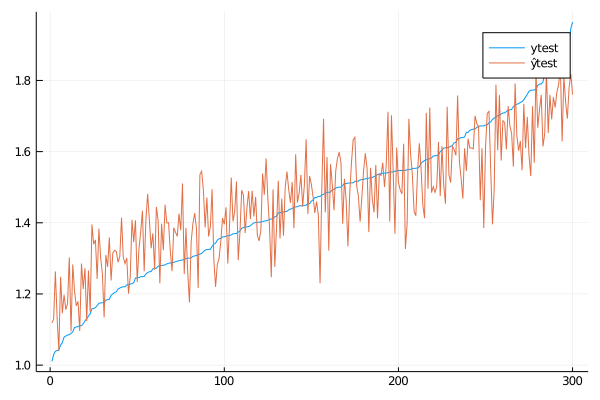

In [8]:
sortIdx = sortperm(ytest)
sortedYtest = ytest[sortIdx]
sortedŶtest = ŷtest[sortIdx]
plot(1:size(ytest,1),[sortedYtest  sortedŶtest],label=["ytest" "ŷtest"])


## Regression: scaling and manual derivatives

In [22]:
xtrain = pi*rand(1000)
ytrain = sin.(xtrain) + 0.5 * cos.(xtrain)
xtest = pi*rand(200)
ytest = sin.(xtest) + 0.5 * cos.(xtest)

200-element Array{Float64,1}:
  0.997035480801499
  0.23237784318172827
  1.1068681940942615
  0.489361704568472
  0.45475468171263056
  0.11806122590056373
  1.115390518688164
  0.7516631849627502
 -0.49957587159116135
  0.04349563371320203
  1.1001936089358906
 -0.26830358240069574
  0.13062186826325495
  ⋮
  1.1004447568894462
  0.7911451887977916
  0.702040223654463
  1.0667766728904142
  0.2522797489823341
  1.0089245388599806
  0.938135128926875
  1.0535206360022678
  0.5752896484803394
 -0.47881563061349375
  1.0649668184452712
  0.7891288414086854

***
*** Training Neural Network for 100 epochs with algorithm SGD.
Training.. 	 avg ϵ on (Epoch 1 Batch 125): 	 2.273207304446989e112
Training.. 	 avg ϵ on (Epoch 10 Batch 125): 	 0.10666172164097881
Training.. 	 avg ϵ on (Epoch 20 Batch 125): 	 0.05943219625006553
Training.. 	 avg ϵ on (Epoch 30 Batch 125): 	 0.055064178431833484
Training.. 	 avg ϵ on (Epoch 40 Batch 125): 	 0.05649476214164951
Training.. 	 avg ϵ on (Epoch 50 Batch 125): 	 0.03931795112667137


Training the Neural Network... 57%|████████████         |  ETA: 0:00:01

Training.. 	 avg ϵ on (Epoch 60 Batch 125): 	 0.17538222444752805
Training.. 	 avg ϵ on (Epoch 70 Batch 125): 	 0.06306352615702332
Training.. 	 avg ϵ on (Epoch 80 Batch 125): 	 0.072224708671455
Training.. 	 avg ϵ on (Epoch 90 Batch 125): 	 0.10008190785600987


Training the Neural Network...100%|█████████████████████| Time: 0:00:01


Training.. 	 avg ϵ on (Epoch 100 Batch 125): 	 0.18681289827109487
Training of 100 epoch completed. Final epoch error: 0.10900804236483598.


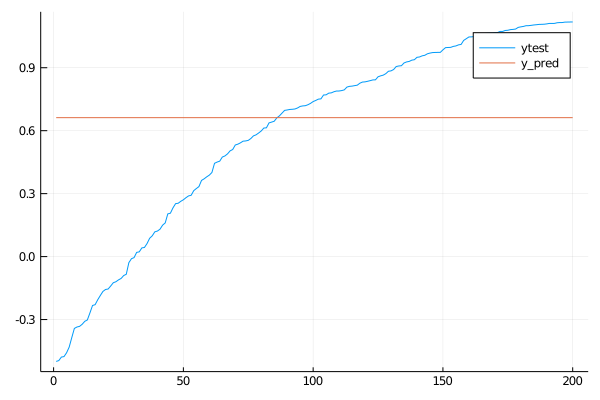

In [23]:
# No scaling...
layers = [DenseLayer(1,3,f=tanh,df=dtanh),
          DenseLayer(3,1,f=identity,df=didentity)]
myfnn = buildNetwork(layers,squaredCost,dcf=dSquaredCost)
train!(myfnn,xtrain,ytrain,epochs=100,batchSize=8,optAlg=SGD())
y_pred = predict(myfnn,xtest)
sortIdx = sortperm(ytest)
sortedYtest = ytest[sortIdx]
sortedYpred = y_pred[sortIdx]
plot(1:size(ytest,1),[sortedYtest  sortedYpred],label=["ytest" "y_pred"])

***
*** Training Neural Network for 100 epochs with algorithm SGD.
Training.. 	 avg ϵ on (Epoch 1 Batch 125): 	 0.0038704868865225197
Training.. 	 avg ϵ on (Epoch 10 Batch 125): 	 0.00028708620737940253
Training.. 	 avg ϵ on (Epoch 20 Batch 125): 	 0.00029716718801966346
Training.. 	 avg ϵ on (Epoch 30 Batch 125): 	 9.779548518442404e-5
Training.. 	 avg ϵ on (Epoch 40 Batch 125): 	 0.000158274570034762
Training.. 	 avg ϵ on (Epoch 50 Batch 125): 	 0.00013840174150402498
Training.. 	 avg ϵ on (Epoch 60 Batch 125): 	 0.0001210484212663098


Training the Neural Network... 62%|█████████████        |  ETA: 0:00:01

Training.. 	 avg ϵ on (Epoch 70 Batch 125): 	 6.99014917241489e-5
Training.. 	 avg ϵ on (Epoch 80 Batch 125): 	 5.704525041921318e-5
Training.. 	 avg ϵ on (Epoch 90 Batch 125): 	 0.00011530646610385652


Training the Neural Network...100%|█████████████████████| Time: 0:00:01


Training.. 	 avg ϵ on (Epoch 100 Batch 125): 	 4.8681012987336525e-5
Training of 100 epoch completed. Final epoch error: 7.214843709690758e-5.


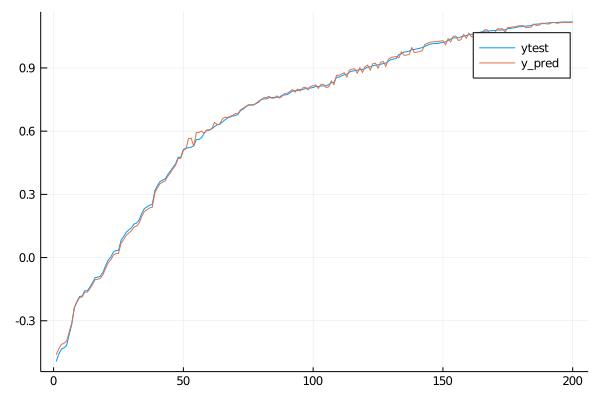

In [11]:
# Scaling of the X only...
layers = [DenseLayer(1,3,f=tanh,df=dtanh),
          DenseLayer(3,1,f=identity,df=didentity)]
myfnn = buildNetwork(layers,squaredCost,dcf=dSquaredCost)
xScaleFactors= getScaleFactors(xtrain)
train!(myfnn,scale(xtrain),ytrain,epochs=100,batchSize=8,optAlg=SGD())
y_pred = predict(myfnn,scale(xtest,xScaleFactors))
sortIdx = sortperm(ytest)
sortedYtest = ytest[sortIdx]
sortedYpred = y_pred[sortIdx]
plot(1:size(ytest,1),[sortedYtest  sortedYpred],label=["ytest" "y_pred"])

***
*** Training Neural Network for 100 epochs with algorithm SGD.
Training.. 	 avg ϵ on (Epoch 1 Batch 125): 	 0.01778761474049685
Training.. 	 avg ϵ on (Epoch 10 Batch 125): 	 0.0007451272838582018
Training.. 	 avg ϵ on (Epoch 20 Batch 125): 	 0.00014127497503230613
Training.. 	 avg ϵ on (Epoch 30 Batch 125): 	 0.00019564879437785116
Training.. 	 avg ϵ on (Epoch 40 Batch 125): 	 0.00022123060226895443
Training.. 	 avg ϵ on (Epoch 50 Batch 125): 	 9.367593332772155e-5
Training.. 	 avg ϵ on (Epoch 60 Batch 125): 	 6.84087540313131e-5


Training the Neural Network... 62%|█████████████        |  ETA: 0:00:01

Training.. 	 avg ϵ on (Epoch 70 Batch 125): 	 5.867291157747592e-5
Training.. 	 avg ϵ on (Epoch 80 Batch 125): 	 0.00022099834645563745
Training.. 	 avg ϵ on (Epoch 90 Batch 125): 	 4.39737707971426e-5


Training the Neural Network...100%|█████████████████████| Time: 0:00:01


Training.. 	 avg ϵ on (Epoch 100 Batch 125): 	 0.00011571733820562067
Training of 100 epoch completed. Final epoch error: 0.00012284983917952778.


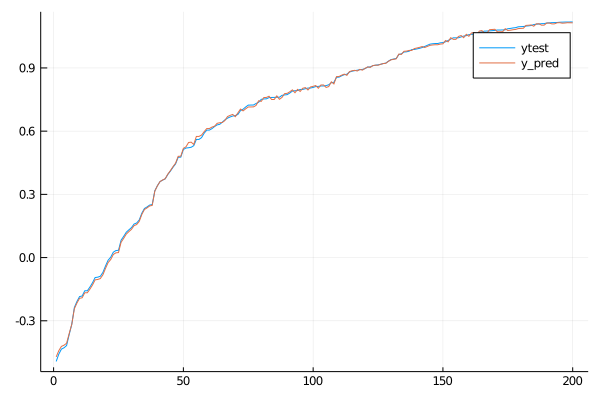

In [12]:
# Scaling of the X and of the Y...
layers = [DenseLayer(1,3,f=tanh,df=dtanh),
          DenseLayer(3,1,f=identity,df=didentity)]
myfnn = buildNetwork(layers,squaredCost,dcf=dSquaredCost)
xScaleFactors = getScaleFactors(xtrain)
yScaleFactors = getScaleFactors(ytrain)
train!(myfnn,scale(xtrain),scale(ytrain),epochs=100,batchSize=8,optAlg=SGD())
y_pred = scale(predict(myfnn,scale(xtest,xScaleFactors)),yScaleFactors,rev=true)
sortIdx = sortperm(ytest)
sortedYtest = ytest[sortIdx]
sortedYpred = y_pred[sortIdx]
plot(1:size(ytest,1),[sortedYtest  sortedYpred],label=["ytest" "y_pred"])

***
*** Training Neural Network for 100 epochs with algorithm ADAM.
Training.. 	 avg ϵ on (Epoch 1 Batch 125): 	 0.7739502490519606
Training.. 	 avg ϵ on (Epoch 10 Batch 125): 	 0.21133950953078204
Training.. 	 avg ϵ on (Epoch 20 Batch 125): 	 0.04637377713222658
Training.. 	 avg ϵ on (Epoch 30 Batch 125): 	 0.041309798515776


Training the Neural Network... 44%|█████████▎           |  ETA: 0:00:01

Training.. 	 avg ϵ on (Epoch 40 Batch 125): 	 0.05094856066698436
Training.. 	 avg ϵ on (Epoch 50 Batch 125): 	 0.02594042958216775
Training.. 	 avg ϵ on (Epoch 60 Batch 125): 	 0.02235361228494754
Training.. 	 avg ϵ on (Epoch 70 Batch 125): 	 0.015029204706694235
Training.. 	 avg ϵ on (Epoch 80 Batch 125): 	 0.014437895286423457


Training the Neural Network... 86%|██████████████████   |  ETA: 0:00:00

Training.. 	 avg ϵ on (Epoch 90 Batch 125): 	 0.005504751325551879


Training the Neural Network...100%|█████████████████████| Time: 0:00:02


Training.. 	 avg ϵ on (Epoch 100 Batch 125): 	 0.00575729552012458
Training of 100 epoch completed. Final epoch error: 0.0067657760494149455.


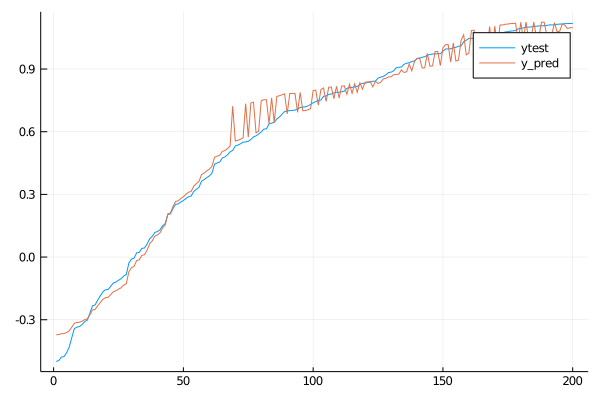

In [26]:
# Scaling of the X and of the Y and using ADAM..
layers = [DenseLayer(1,3,f=tanh,df=dtanh),
          DenseLayer(3,1,f=identity,df=didentity)]
myfnn = buildNetwork(layers,squaredCost,dcf=dSquaredCost)
xScaleFactors = getScaleFactors(xtrain)
yScaleFactors = getScaleFactors(ytrain)
train!(myfnn,scale(xtrain),scale(ytrain),epochs=100,batchSize=8,optAlg=ADAM())
y_pred = scale(predict(myfnn,scale(xtest,xScaleFactors)),yScaleFactors,rev=true)
sortIdx = sortperm(ytest)
sortedYtest = ytest[sortIdx]
sortedYpred = y_pred[sortIdx]
plot(1:size(ytest,1),[sortedYtest  sortedYpred],label=["ytest" "y_pred"])

## Classification

In [27]:
# Load the data
iris     = readdlm(joinpath(dirname(Base.find_package("BetaML")),"..","test","data","iris.csv"),',',skipstart=1)
iris     = iris[shuffle(axes(iris, 1)), :] # Shuffle the records, as they aren't by default
x        = convert(Array{Float64,2}, iris[:,1:4])
y        = map(x->Dict("setosa" => 1, "versicolor" => 2, "virginica" =>3)[x],iris[:, 5]) # Convert the target column to numbers
y_oh     = oneHotEncoder(y) # Convert to One-hot representation (e.g. 2 => [0 1 0], 3 => [0 0 1])

150×3 Array{Int64,2}:
 0  0  1
 1  0  0
 0  0  1
 0  0  1
 0  1  0
 0  1  0
 1  0  0
 0  0  1
 0  0  1
 1  0  0
 1  0  0
 1  0  0
 1  0  0
 ⋮     
 0  0  1
 1  0  0
 0  0  1
 1  0  0
 1  0  0
 0  0  1
 1  0  0
 0  1  0
 0  1  0
 0  1  0
 0  0  1
 1  0  0

In [28]:
# Split the data in training/testing sets
ntrain    = Int64(round(size(x,1)*0.8))
xtrain    = x[1:ntrain,:]
ytrain    = y[1:ntrain]
ytrain_oh = y_oh[1:ntrain,:]
xtest     = x[ntrain+1:end,:]
ytest     = y[ntrain+1:end]

30-element Array{Int64,1}:
 3
 2
 2
 3
 1
 3
 2
 2
 2
 2
 1
 3
 1
 ⋮
 3
 1
 3
 1
 1
 3
 1
 2
 2
 2
 3
 1

In [29]:
# Define the Artificial Neural Network model
l1   = DenseLayer(4,10,f=relu) # Activation function is ReLU
l2   = DenseLayer(10,3)        # Activation function is identity by default
l3   = VectorFunctionLayer(3,3,f=softmax) # Add a (parameterless) layer whose activation function (softMax in this case) is defined to all its nodes at once
mynn = buildNetwork([l1,l2,l3],squaredCost,name="Multinomial logistic regression Model Sepal") # Build the NN and use the squared cost (aka MSE) as error function



NN(Layer[DenseLayer([0.7547148074968231 0.9095860588768603 0.35748208798121395 0.7647516520735158; 0.48238235856910494 0.1288648395027696 0.27558043666720144 0.3404356971905158; … ; 0.24705433954839284 0.19195044868081657 0.7766583771249207 0.5453138668410027; 0.23591365871055014 0.6252334956638874 0.4328058684012881 0.24628033650488623], [0.08314953611392872, 0.8270453653937622, 0.5856929130499211, 0.5078439306779801, 0.32666208434594934, 0.12464466853098144, 0.17486018359781497, 0.6274028698732002, 0.1894948455630281, 0.6762032857225782], BetaML.Utils.relu, nothing), DenseLayer([0.9923340473071665 0.5650764111486606 … 0.3476382527581192 0.20681834555507428; 0.41699346039062024 0.11836851722097252 … 0.6608348897647389 0.7245597635352663; 0.7352594999000039 0.32979877358537113 … 0.2844825899999075 0.4248531876982906], [0.11959853810849119, 0.49377151485926096, 0.40698512415694665], identity, nothing), VectorFunctionLayer(3, 3, BetaML.Utils.softmax, nothing)], BetaML.Utils.squaredCost, 

In [30]:
# Training it (default to ADAM)
res = train!(mynn,scale(xtrain),ytrain_oh,epochs=100,batchSize=6,optAlg=SGD()) # Use optAlg=ADAM (Moment-based stochastic gradient descent) by default

***
*** Training Multinomial logistic regression Model Sepal for 100 epochs with algorithm SGD.
Training.. 	 avg ϵ on (Epoch 1 Batch 20): 	 0.02718003433081841
Training.. 	 avg ϵ on (Epoch 10 Batch 20): 	 0.016291953493186778
Training.. 	 avg ϵ on (Epoch 20 Batch 20): 	 0.030432376882698897
Training.. 	 avg ϵ on (Epoch 30 Batch 20): 	 0.009780101300844854
Training.. 	 avg ϵ on (Epoch 40 Batch 20): 	 0.06794487116155024
Training.. 	 avg ϵ on (Epoch 50 Batch 20): 	 0.010758947456090863
Training.. 	 avg ϵ on (Epoch 60 Batch 20): 	 0.004610293989705889
Training.. 	 avg ϵ on (Epoch 70 Batch 20): 	 0.010059729868719388
Training.. 	 avg ϵ on (Epoch 80 Batch 20): 	 0.0036108890273514496


Training the Neural Network... 81%|█████████████████    |  ETA: 0:00:00

Training.. 	 avg ϵ on (Epoch 90 Batch 20): 	 0.0035807194212654028


Training the Neural Network...100%|█████████████████████| Time: 0:00:01


Training.. 	 avg ϵ on (Epoch 100 Batch 20): 	 0.06822587430797766
Training of 100 epoch completed. Final epoch error: 0.01631970449373337.


(epochs = 100, ϵ_epochs = [0.4360722122965101, 0.3613813606470192, 0.11034031323601784, 0.09228057558555643, 0.08661274390965686, 0.0596167203357849, 0.047993679540058155, 0.04736864842079642, 0.039850834108807895, 0.0326307689265857  …  0.016509954241492254, 0.016487386886266494, 0.01646415800673811, 0.016444799239699884, 0.016421618889589176, 0.016401773339470856, 0.01638063136571298, 0.016360383759525202, 0.016341585908294258, 0.01631970449373337], θ_epochs = Any[])

In [31]:
# Test it
ŷtrain        = predict(mynn,scale(xtrain))   # Note the scaling function
ŷtest         = predict(mynn,scale(xtest))
trainAccuracy = accuracy(ŷtrain,ytrain,tol=1) # 0.983
testAccuracy  = accuracy(ŷtest,ytest,tol=1)   # 1.0

0.9

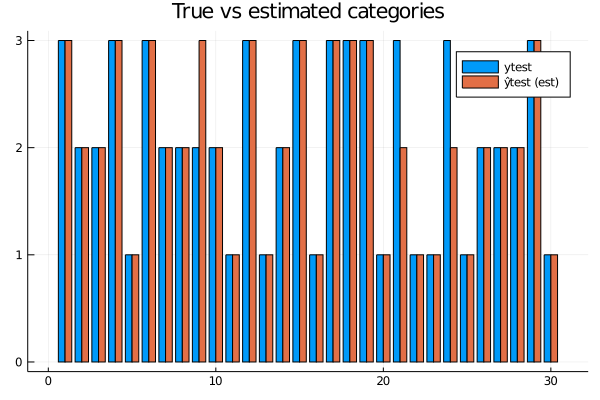

In [32]:
# Visualise results
testSize = size(ŷtest,1)
ŷtestChosen =  [argmax(ŷtest[i,:]) for i in 1:testSize]
groupedbar([ytest ŷtestChosen], label=["ytest" "ŷtest (est)"], title="True vs estimated categories") # All records correctly labelled !

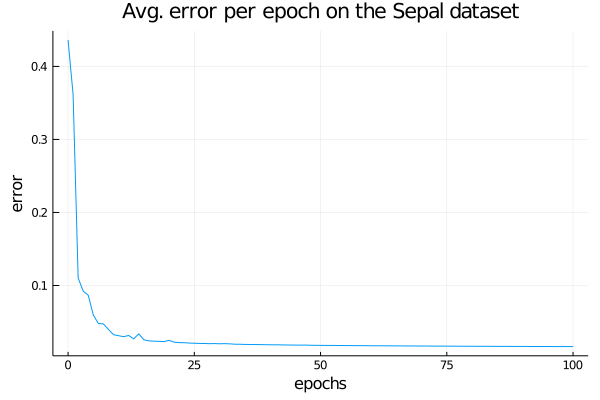

In [33]:
plot(0:res.epochs,res.ϵ_epochs, ylabel="error",xlabel="epochs",legend=nothing,title="Avg. error per epoch on the Sepal dataset")